In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary

from pytorchcv import load_mnist, train, plot_results
load_mnist(batch_size=128)

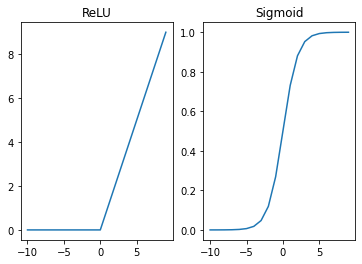

In [2]:
def plot_function(f,name=''):
    plt.plot(range(-10,10), [f(torch.tensor(x,dtype=torch.float32)).item() for x in range(-10,10)])
    plt.title(name)

plt.subplot(121)
plot_function(torch.relu,'ReLU')
plt.subplot(122)
plot_function(torch.sigmoid,'Sigmoid')


In [3]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,100),     # 784 inputs, 100 outputs
        nn.ReLU(),              # Activation Function
        nn.Linear(100,10),      # 100 inputs, 10 outputs
        nn.LogSoftmax(dim=0))

summary(net,input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 10]                   1,010
├─LogSoftmax: 1-5                        [1, 10]                   --
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Epoch  0, Train acc=0.931, Val acc=0.951, Train loss=0.023, Val loss=0.022
Epoch  1, Train acc=0.959, Val acc=0.960, Train loss=0.022, Val loss=0.022
Epoch  2, Train acc=0.967, Val acc=0.962, Train loss=0.021, Val loss=0.022
Epoch  3, Train acc=0.970, Val acc=0.963, Train loss=0.021, Val loss=0.022
Epoch  4, Train acc=0.972, Val acc=0.961, Train loss=0.021, Val loss=0.022


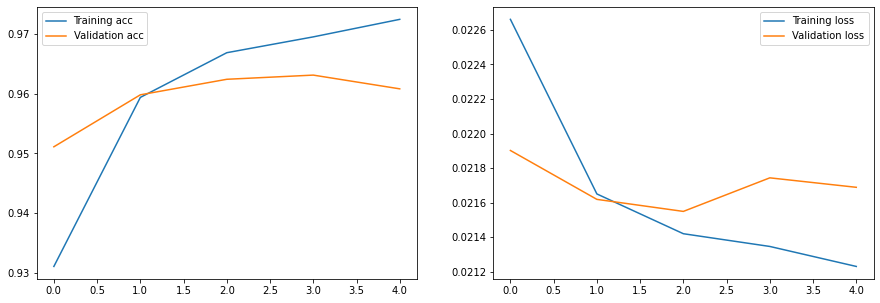

In [4]:
hist = train(net,train_loader,test_loader, epochs=5)
plot_results(hist)

In [5]:
from torch.nn.functional import relu,log_softmax

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(784,100)
        self.out = nn.Linear(100,10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = relu(x)
        x = self.out(x)
        x = log_softmax(x,dim=0)
        return x

net = MyNet()

summary(net,input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─Linear: 1-3                            [1, 10]                   1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Epoch  0, Train acc=0.931, Val acc=0.955, Train loss=0.023, Val loss=0.022
Epoch  1, Train acc=0.961, Val acc=0.957, Train loss=0.022, Val loss=0.022
Epoch  2, Train acc=0.966, Val acc=0.958, Train loss=0.021, Val loss=0.022
Epoch  3, Train acc=0.970, Val acc=0.962, Train loss=0.021, Val loss=0.022
Epoch  4, Train acc=0.973, Val acc=0.965, Train loss=0.021, Val loss=0.022


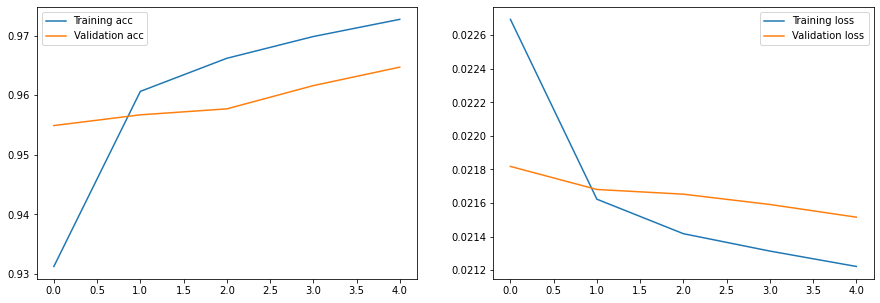

In [6]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)